In [3]:
%matplotlib notebook

In [4]:
import sys
sys.path.append("/Users/massin/Google Drive/Projects/NaiNo-Kami/Py/NnK")
import eew 
import obspy
import matplotlib
from imp import reload

In [11]:
from obspy.clients.fdsn import Client
client = Client("http://165.98.224.59:8080/")#http://163.178.170.203:8080/")

network = client.get_stations(level='station',
                              channel='ENZ,SNZ,EHZ,HHZ,HNZ',
                              maxradius=4,
                              latitude=12,
                              longitude=-86)
reload(eew.inventory_addons)
rtnetwork=eew.inventory_addons.slink2inv(network,slink_server_url='165.98.224.59:18000')

<IPython.core.display.Javascript object>


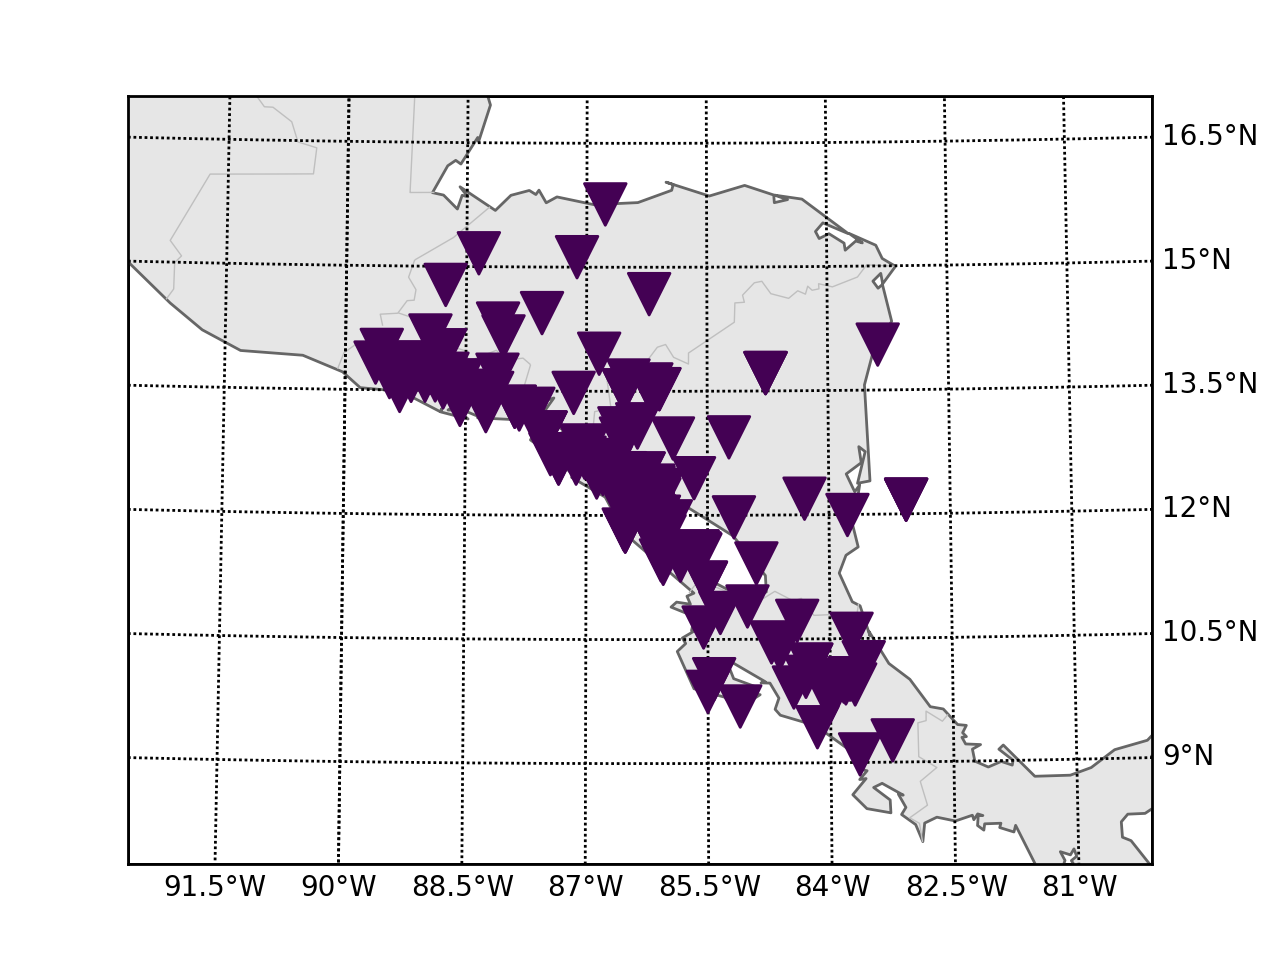

<IPython.core.display.Javascript object>


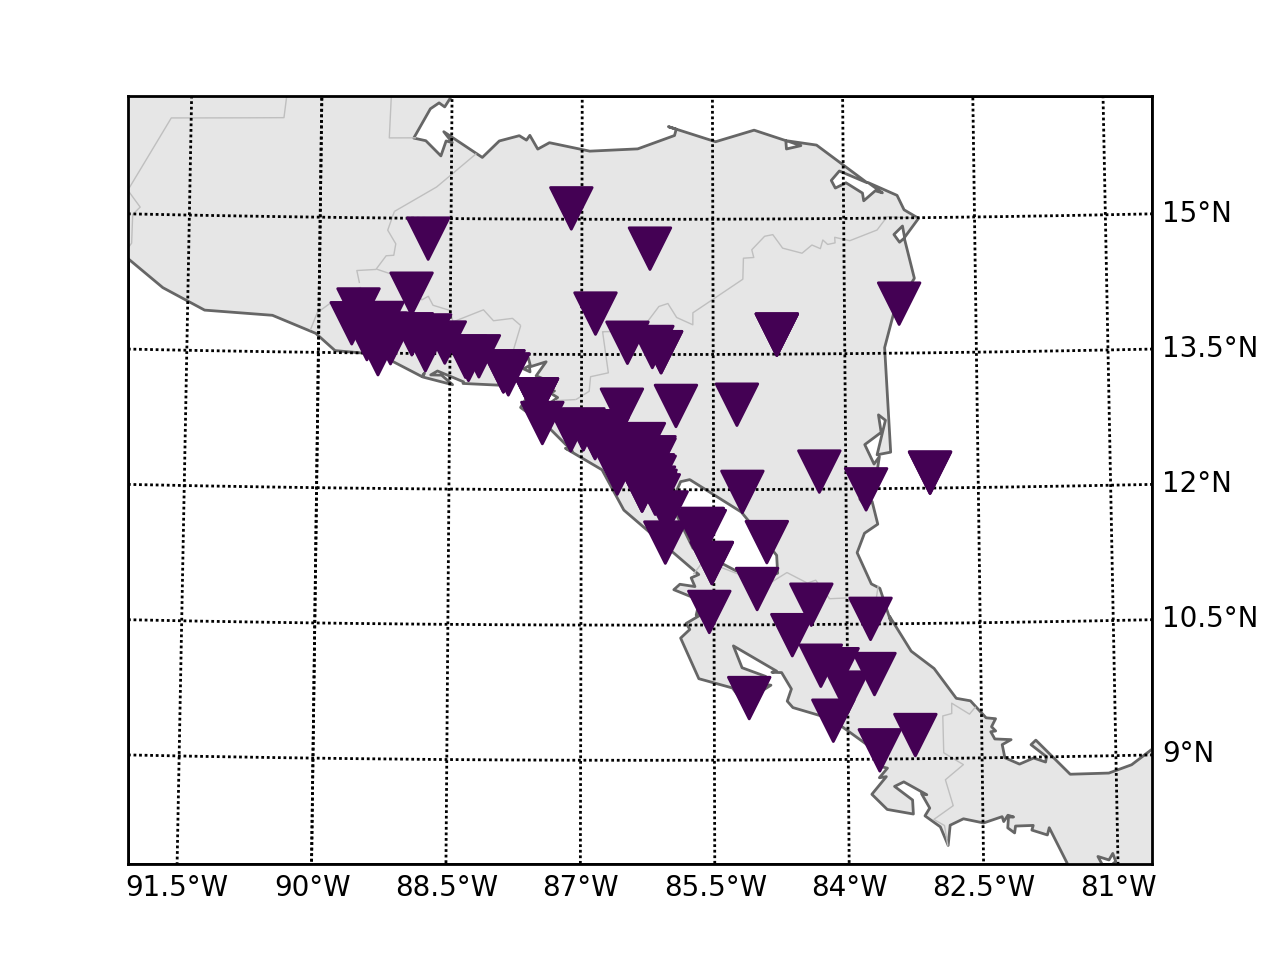

In [12]:
f=network.plot(color=1,projection='local')
f=rtnetwork.plot(color=1,projection='local')

In [9]:
from numpy import loadtxt

lines = loadtxt("https://raw.githubusercontent.com/SeisComP3/seiscomp3/master/src/trunk/apps/processing/scautoloc/config/grid.conf")
grid=lines.transpose()

# for d$_4^{req}$ 

In [17]:
reload(eew.obspy_addons)
reload(eew.inventory_addons)
f = eew.inventory_addons.plot_traveltimes(rtnetwork,
                                          scautolocgrid=True,
                                          N=range(1,9),
                                          dmin=[8,0,0],
                                          depth=10,
                                          scautolocgridminn=4,
                                          scautolocgridfile='grid-INETER-XXL.conf',
                                          grid=grid,
                                          plot='none',
                                          teleseism_min_stat=9
                                          )

for i,depth in enumerate([20, 40, 80, 160]):
    print(depth,'grid-INETER-Z%d.conf'%(i))
    f = eew.inventory_addons.plot_traveltimes(rtnetwork,
                                              N=range(1,9),
                                              dmin=[8,0,0],
                                              scautolocgridminn=4,
                                              scautolocgridfile='grid-INETER-Z%d.conf'%(i),
                                              scautolocgrid=True,
                                              depth=depth,
                                              bits=3*1024,
                                              tmax=40.,
                                              plot='none',
                                              apbounds=[[-86-4.5,-79.5],[6,14+4.5]],
                                              teleseism_min_stat=9
                                              )

scautolocgridfile
20 grid-INETER-Z0.conf
scautolocgridfile
40 grid-INETER-Z1.conf
scautolocgridfile
80 grid-INETER-Z2.conf
scautolocgridfile
160 grid-INETER-Z3.conf
scautolocgridfile


In [18]:
!cat grid-INETER-Z*.conf > grid-INETER.conf
!minmax grid-INETER-XXL.conf
!minmax grid-INETER.conf
!awk '$2<0{print $1,360+$2,$3,$4,$5,$6};$2>0{print $0}' grid-INETER-XXL.conf > tmp.conf
!mv tmp.conf grid-INETER-XXL.conf
!awk '$2<0{print $1,360+$2,$3,$4,$5,$6};$2>0{print $0}' grid-INETER.conf > tmp.conf
!mv tmp.conf grid-INETER.conf
!minmax grid-INETER-XXL.conf
!minmax grid-INETER.conf

minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-INETER-XXL.conf: N = 2120	<-90/90>	<-177.46/180>	<33/600>	<4/4>	<3.17/174.13>	<9/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-INETER.conf: N = 12544	<6.19/17.94>	<-92.53/-80.23>	<20/160>	<0.15/0.15>	<0.16/8.2>	<4/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-INETER-XXL.conf: N = 2120	<-90/90>	<0/355>	<33/600>	<4/4>	<3.17/174.13>	<9/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-INETER.conf: N = 12544	<6.19/17.94>	<268/280>	<20/160>	<0.15/0.15>	<0.16/8.2>	<4/9>


In [19]:
!rm grid-INETER-XXL.filtered.conf
!rm grid-INETER-merged.conf
!awk '(($1<6.19 || $1>17.94) && ($2<268 || $2>280)){print $0}' grid-INETER-XXL.conf > grid-INETER-XXL.filtered.conf
!cat grid-INETER-XXL.filtered.conf grid-INETER.conf  > grid-INETER-merged.conf
!wc -l grid-INETER-merged.conf grid-INETER.conf grid-INETER-XXL.conf grid-INETER-XXL.filtered.conf
!scp grid-INETER-merged.conf grid-INETER.conf grid-INETER-XXL.conf sc-eew-1:seiscomp3/etc/

rm: grid-INETER-XXL.filtered.conf: No such file or directory
   14578 grid-INETER-merged.conf
   12544 grid-INETER.conf
    2120 grid-INETER-XXL.conf
    2034 grid-INETER-XXL.filtered.conf
   31276 total
grid-INETER-merged.conf                       100%  390KB  11.7MB/s   00:00    
grid-INETER.conf                              100%  330KB  14.3MB/s   00:00    
grid-INETER-XXL.conf                          100%   63KB   6.6MB/s   00:00    
